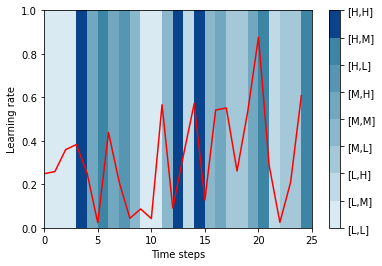

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Tạo dữ liệu mẫu
time_steps = np.arange(1, 26)
learning_rate = np.random.rand(25)

# Tạo ma trận dữ liệu cho heatmap
heatmap_data = np.random.rand(25, 1)

# Thiết lập màu cho heatmap
cmap = mcolors.ListedColormap(['#d9eaf3', '#bfd9e6', '#a5c8d9', '#8bb7cc', '#71a7bf', '#5796b2', '#3d85a5', '#236498', '#09438b'])
bounds = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Vẽ heatmap
fig, ax = plt.subplots()
cax = ax.imshow(heatmap_data.T, aspect='auto', cmap=cmap, norm=norm, extent=[0, 25, 0, 1])

# Thêm colorbar
cbar = fig.colorbar(cax, ticks=[0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1])
cbar.ax.set_yticklabels(['[L,L]', '[L,M]', '[L,H]', '[M,L]', '[M,M]', '[M,H]', '[H,L]', '[H,M]', '[H,H]'])

# Vẽ đường biểu đồ Learning rate
ax.plot(time_steps - 1, learning_rate, color='red')

# Thiết lập nhãn cho trục
ax.set_xlabel('Time steps')
ax.set_ylabel('Learning rate')

# Hiển thị hình
plt.show()


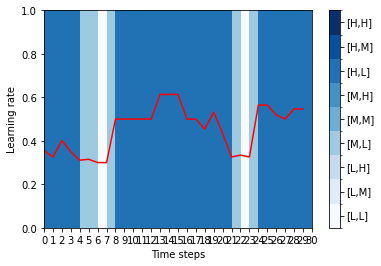

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import pandas as pd
from matplotlib import colormaps

# Tạo dataframe từ dữ liệu cung cấp
data = {
    'Step': np.arange(1, 31),
    'vRTT': [0, 0, 0.149473, 0.12323, 0.110922, 0.115128, 0.074484, 0.088543, 0.088543, 0.088543, 0.088543, 0.088543, 0.088543, 0.213411, 0.213411, 0.213411, 0.014075, 0.014075, 0.053801, 0.163103, 0.163103, 0.12587, 0.12587, 0.12587, 0.164518, 0.164518, 0.118937, 0.099334, 0.146575, 0.146575],
    'CWNDlevel': [0.683268, 0.638604, 0.652121, 0.622293, 0.592466, 0.562638, 0.352651, 0.557402, 0.915334, 0.951083, 1.010738, 0.98091, 0.951083, 0.951083, 0.98091, 0.98091, 0.951083, 0.921255, 0.831772, 0.859346, 0.68038, 0.561069, 0.325851, 0.445161, 0.981463, 0.981463, 0.951635, 0.953889, 0.983716, 0.983716],
    'Learning rate': [0.355512, 0.325736, 0.401358, 0.349292, 0.310922, 0.315128, 0.3, 0.3, 0.5, 0.5, 0.5, 0.5, 0.5, 0.613411, 0.613411, 0.613411, 0.5, 0.5, 0.454515, 0.531704, 0.434294, 0.32587, 0.334103, 0.32587, 0.564518, 0.564518, 0.518937, 0.5, 0.546575, 0.546575]
}
df = pd.DataFrame(data)

# Tạo ma trận dữ liệu cho heatmap
heatmap_data = np.zeros((30, 1))

# Gán giá trị cho heatmap dựa trên dữ liệu CWNDlevel và vRTT
for i in range(30):
    if df.loc[i, 'CWNDlevel'] > 0.6:
        if df.loc[i, 'vRTT'] > 0.4:
            heatmap_data[i, 0] = 8  # [H,H]
        elif df.loc[i, 'vRTT'] > 0.3:
            heatmap_data[i, 0] = 7  # [H,M]
        else:
            heatmap_data[i, 0] = 6  # [H,L]
    elif df.loc[i, 'CWNDlevel'] > 0.4:
        if df.loc[i, 'vRTT'] > 0.4:
            heatmap_data[i, 0] = 5  # [M,H]
        elif df.loc[i, 'vRTT'] > 0.3:
            heatmap_data[i, 0] = 4  # [M,M]
        else:
            heatmap_data[i, 0] = 3  # [M,L]
    else:
        if df.loc[i, 'vRTT'] > 0.4:
            heatmap_data[i, 0] = 2  # [L,H]
        elif df.loc[i, 'vRTT'] > 0.3:
            heatmap_data[i, 0] = 1  # [L,M]
        else:
            heatmap_data[i, 0] = 0  # [L,L]

# Sử dụng colormap từ matplotlib
cmap = colormaps['Blues']  # Sử dụng colormap RdYlGn
bounds = np.arange(10) - 0.5
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Vẽ heatmap
fig, ax = plt.subplots()
cax = ax.imshow(heatmap_data.T, aspect='auto', cmap=cmap, norm=norm, extent=[0, 30, 0, 1])

# Thêm colorbar
cbar = fig.colorbar(cax, ticks=np.arange(9))
cbar.ax.set_yticklabels(['[L,L]', '[L,M]', '[L,H]', '[M,L]', '[M,M]', '[M,H]', '[H,L]', '[H,M]', '[H,H]'], va='center')

# Vẽ đường biểu đồ Learning rate
ax.plot(df['Step'] - 1, df['Learning rate'], color='red')

# Thiết lập nhãn cho trục
ax.set_xlabel('Time steps')
ax.set_ylabel('Learning rate')

# Đảm bảo rằng giá trị trục x là số nguyên
ax.set_xticks(np.arange(0, 31, 1))

# Hiển thị hình
plt.show()
